**MARKETING ANALYTICS PROJECT**

**AIM:**
THIS PROJECT AIMS TO PERFORM ANALYSIS LIKE DESCRIPTIVE ANALYSIS, EXPLORATORY DATA ANALYSIS, INFERENTIAL ANALYSIS, CHURN ANALYSIS, CLUSTERING, ASSOCIATION RULE- MINING, PREDICTIVE ANALYSIS AND MAKE RECOMMENDATIONS ON WHERE TO IMPROVE AS A BUSINESS.

**DATASET:** ECOMMERCE_CONSUMER.CSV

**COLUMNS:**

1. order_id – (A unique number to identity the order)

2. user_id - (A unique number to identify the user)

3. order_number – (Number of the order)

4. order_dow – (Day of the Week the order was made)

5. order_hour_of_day – (Time of the order)

6. days_since_prior_order - (History of the order)

7. product_id – (Id of the product)

8. add_to_cart_order – (Number of items added to cart)

9. reordered – (If the reorder took place)

10. department_id - (Unique number allocated to each department)

11. department – (Names of the departments)

12. product_name – (Name of the products)

# **IMPORTING PACKAGES**

In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘permute’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘RcppArmadillo’, ‘ca’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘crosstalk’, ‘lazyeval’, ‘arules’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [ ]:
# Load required libraries
library(tidyverse)   # Data manipulation & visualization(%>%)
library(cluster)     # Clustering analysis
library(arules)      # Association rule mining
library(caret)       # classification and regression
library(ggplot2)     # Plotting
library(dplyr)       # Data manipulation - select,mutate,summarise,group_by
library(rpart)       # Decision Trees
library(rpart.plot)  # Decision Tree Visualization
library(gridExtra)   # For arranging multiple plots
library(arulesViz)   # For association rules visualization

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘

In [ ]:
# loading data
ecom_data <- read.csv("/content/ECommerce_consumer.csv")

# **DESCRIPTIVE ANALYSIS**

df- sensible columns for describing(order_number, order_dow, order_hour_of_day, days_since_prior_order, add_to_cart_order, reordered)

ecom_data- full data

In [ ]:
head(ecom_data)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,2425083,49125,1,2,18,NA,17,1,0,13,pantry,baking ingredients
2,2425083,49125,1,2,18,NA,91,2,0,16,dairy eggs,soy lactosefree
3,2425083,49125,1,2,18,NA,36,3,0,16,dairy eggs,butter
4,2425083,49125,1,2,18,NA,83,4,0,4,produce,fresh vegetables
5,2425083,49125,1,2,18,NA,83,5,0,4,produce,fresh vegetables
6,2425083,49125,1,2,18,NA,91,6,0,16,dairy eggs,soy lactosefree


In [ ]:
dim(ecom_data)


[1] 2019501      12

In [ ]:
# info
str(ecom_data)

'data.frame':	2019501 obs. of  12 variables:
 $ order_id              : int  2425083 2425083 2425083 2425083 2425083 2425083 2425083 2425083 2425083 1944304 ...
 $ user_id               : int  49125 49125 49125 49125 49125 49125 49125 49125 49125 162867 ...
 $ order_number          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ order_dow             : int  2 2 2 2 2 2 2 2 2 3 ...
 $ order_hour_of_day     : int  18 18 18 18 18 18 18 18 18 17 ...
 $ days_since_prior_order: num  NA NA NA NA NA NA NA NA NA NA ...
 $ product_id            : int  17 91 36 83 83 91 120 59 35 37 ...
 $ add_to_cart_order     : int  1 2 3 4 5 6 7 8 9 1 ...
 $ reordered             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ department_id         : int  13 16 16 4 4 16 16 15 12 1 ...
 $ department            : chr  "pantry" "dairy eggs" "dairy eggs" "produce" ...
 $ product_name          : chr  "baking ingredients" "soy lactosefree" "butter" "fresh vegetables" ...


In [ ]:
summary(ecom_data)

    order_id          user_id        order_number      order_dow    
 Min.   :     10   Min.   :     2   Min.   :  1.00   Min.   :0.000  
 1st Qu.: 852649   1st Qu.: 51584   1st Qu.:  5.00   1st Qu.:1.000  
 Median :1705004   Median :102690   Median : 11.00   Median :3.000  
 Mean   :1707013   Mean   :103067   Mean   : 17.15   Mean   :2.735  
 3rd Qu.:2559031   3rd Qu.:154600   3rd Qu.: 24.00   3rd Qu.:5.000  
 Max.   :3421080   Max.   :206209   Max.   :100.00   Max.   :6.000  
                                                                    
 order_hour_of_day days_since_prior_order   product_id     add_to_cart_order
 Min.   : 0.00     Min.   : 0.00          Min.   :  1.00   Min.   :  1.000  
 1st Qu.:10.00     1st Qu.: 5.00          1st Qu.: 31.00   1st Qu.:  3.000  
 Median :13.00     Median : 8.00          Median : 83.00   Median :  6.000  
 Mean   :13.44     Mean   :11.39          Mean   : 71.21   Mean   :  8.363  
 3rd Qu.:16.00     3rd Qu.:15.00          3rd Qu.:107.00   3rd 

In [ ]:
#duplicate rows count
sum(duplicated(ecom_data))

[1] 0

Selecting by n


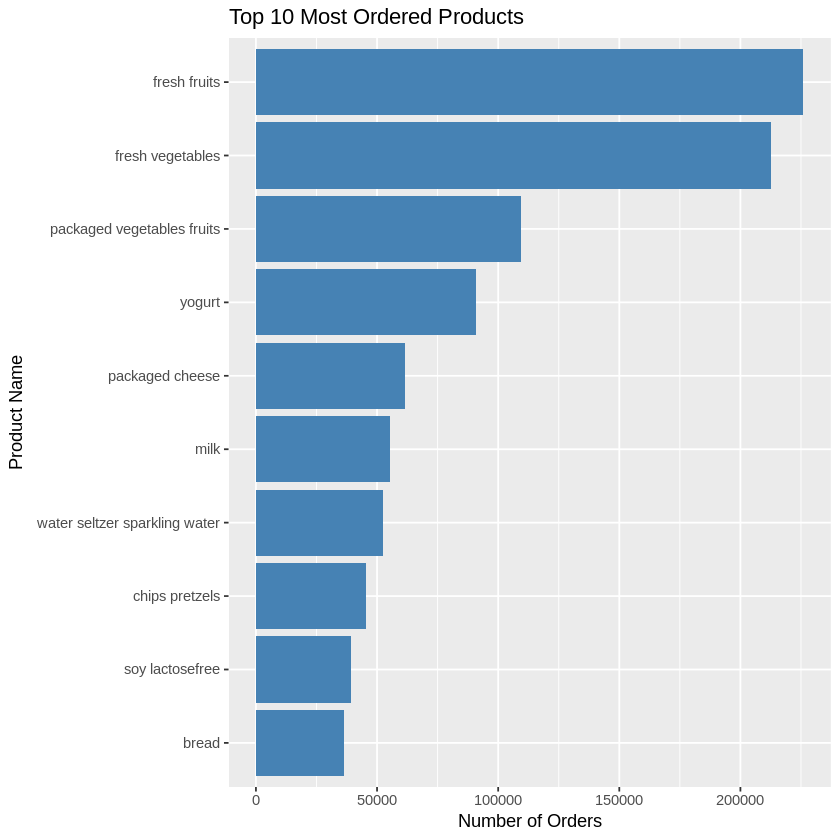

In [ ]:
#top 10 products-----layered approach
ecom_data %>%
  count(product_name, sort = TRUE) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(product_name, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") + #geometric object
  coord_flip() + # used for flipping axes when vales are too long to read
  ggtitle("Top 10 Most Ordered Products") +
  xlab("Product Name") + ylab("Number of Orders")


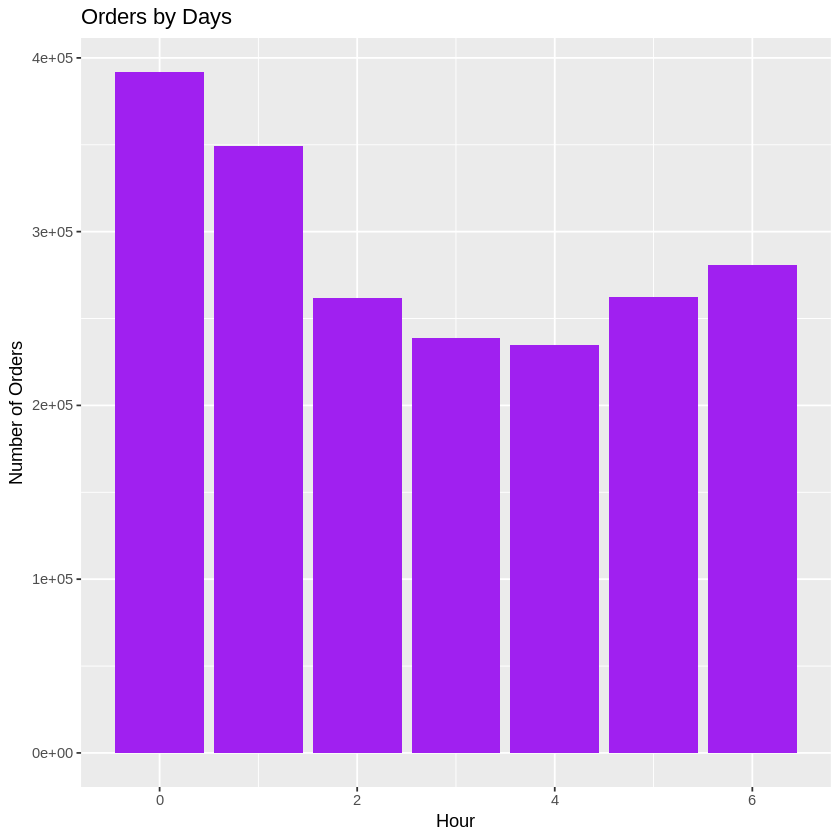

In [ ]:
#orders by day of week
ggplot(ecom_data, aes(x = order_dow)) +
  geom_bar(fill = "purple") +
  ggtitle("Orders by Days") +
  xlab("Hour") + ylab("Number of Orders")

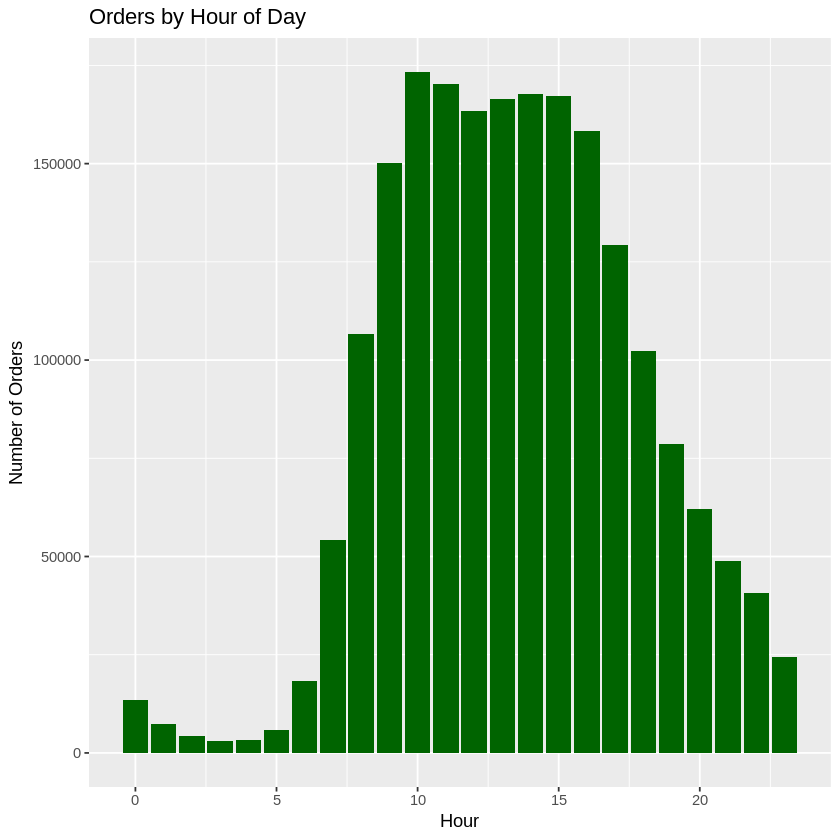

In [ ]:
#orders by hrs
ggplot(ecom_data, aes(x = order_hour_of_day)) +
  geom_bar(fill = "darkgreen") +
  ggtitle("Orders by Hour of Day") +
  xlab("Hour") + ylab("Number of Orders")

Selecting by n


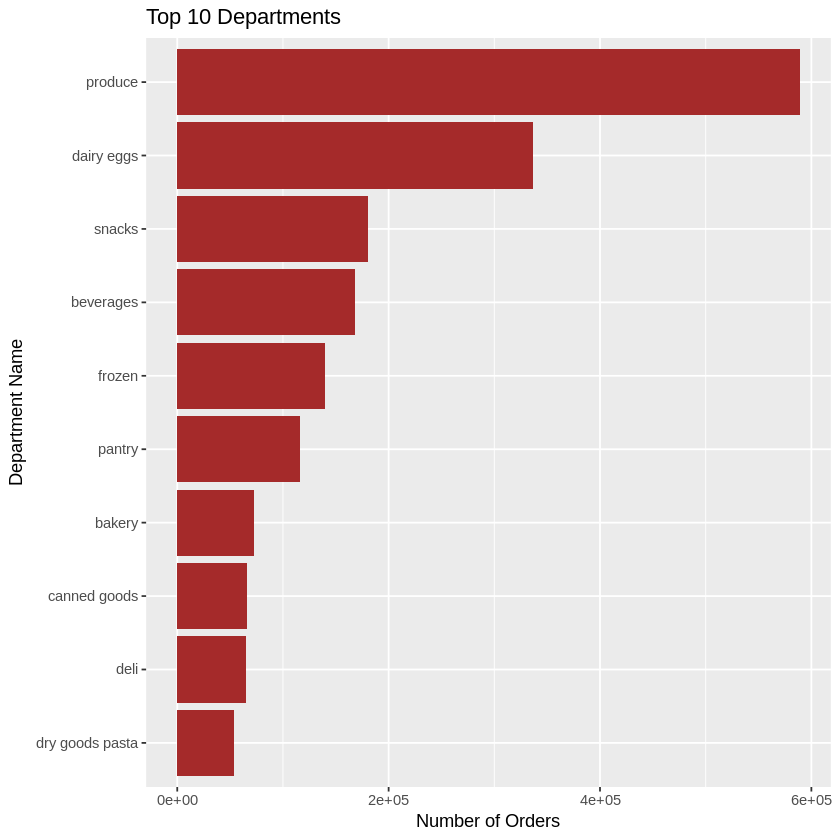

In [ ]:
#top 10 departments-----layered approach
ecom_data %>%
  count(department, sort = TRUE) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(department, n), y = n)) +
  geom_bar(stat = "identity", fill = "brown") + #geometric object
  coord_flip() + # used for flipping axes when vales are too long to read
  ggtitle("Top 10 Departments") +
  xlab("Department Name") + ylab("Number of Orders")


In [ ]:
#reorder rate
table(ecom_data$reordered) / nrow(ecom_data) * 100
#0- not reordered 1- reordered in %


       0        1 
41.02573 58.97427 

Warning message:
“Removed 124342 rows containing non-finite outside the scale range
(`stat_bin()`).”


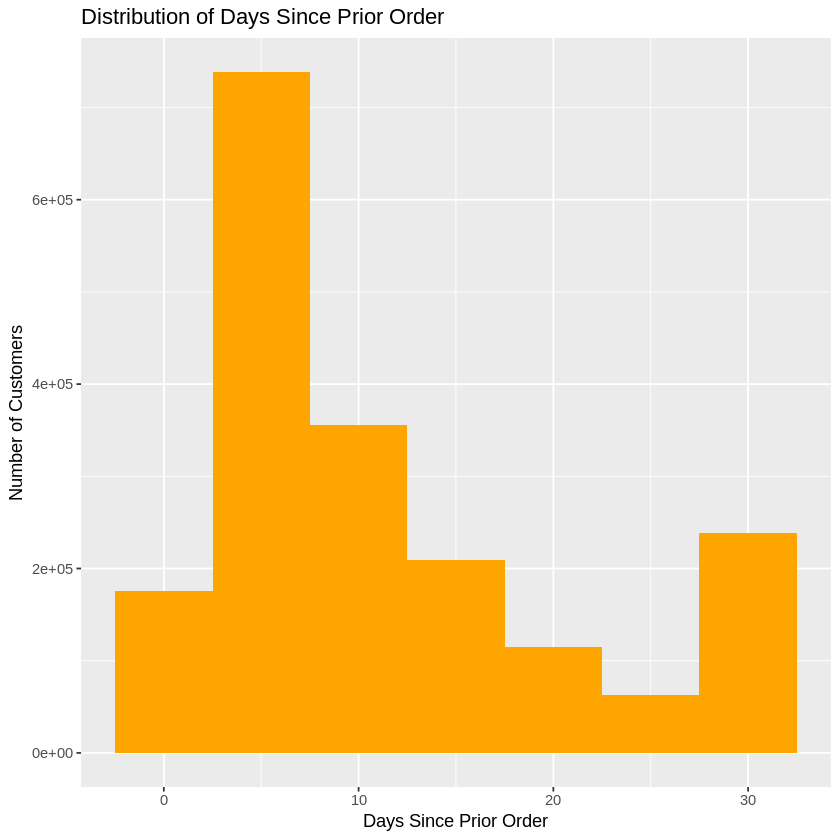

In [ ]:
#customer purchase frequency
ggplot(ecom_data, aes(x = days_since_prior_order)) +
  geom_histogram(binwidth = 5, fill = "orange") +
  ggtitle("Distribution of Days Since Prior Order") +
  xlab("Days Since Prior Order") + ylab("Number of Customers")


# **EXPLORATORY DATA ANALYSIS**

find and replace missing values

outlier detection using iqr method

label encoding

standardising

correlation



In [ ]:
# check for missing values
sum(is.na(ecom_data))

[1] 124342

In [ ]:
#replace
df <- ecom_data %>%
  mutate(across(where(is.numeric), ~ replace_na(., median(., na.rm = TRUE)))) %>% #~Allows defining inline functions easily.mutate allows us to modify across columns
  mutate(across(where(is.character), ~ replace_na(., "Unknown")))
head(df)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,2425083,49125,1,2,18,8,17,1,0,13,pantry,baking ingredients
2,2425083,49125,1,2,18,8,91,2,0,16,dairy eggs,soy lactosefree
3,2425083,49125,1,2,18,8,36,3,0,16,dairy eggs,butter
4,2425083,49125,1,2,18,8,83,4,0,4,produce,fresh vegetables
5,2425083,49125,1,2,18,8,83,5,0,4,produce,fresh vegetables
6,2425083,49125,1,2,18,8,91,6,0,16,dairy eggs,soy lactosefree


In [ ]:
sum(is.na(df))

[1] 0

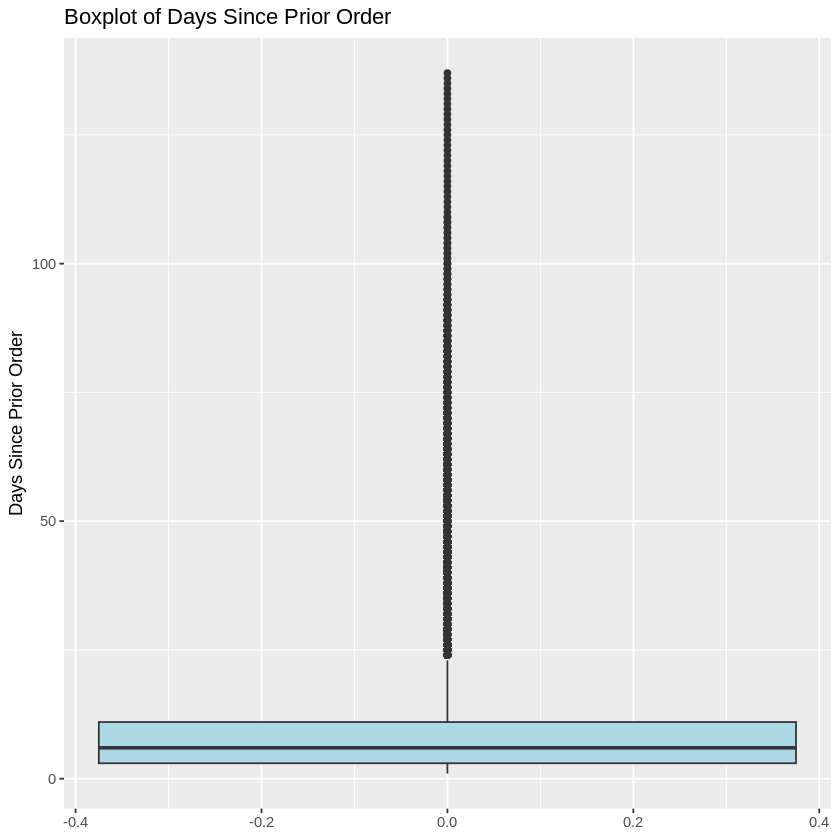

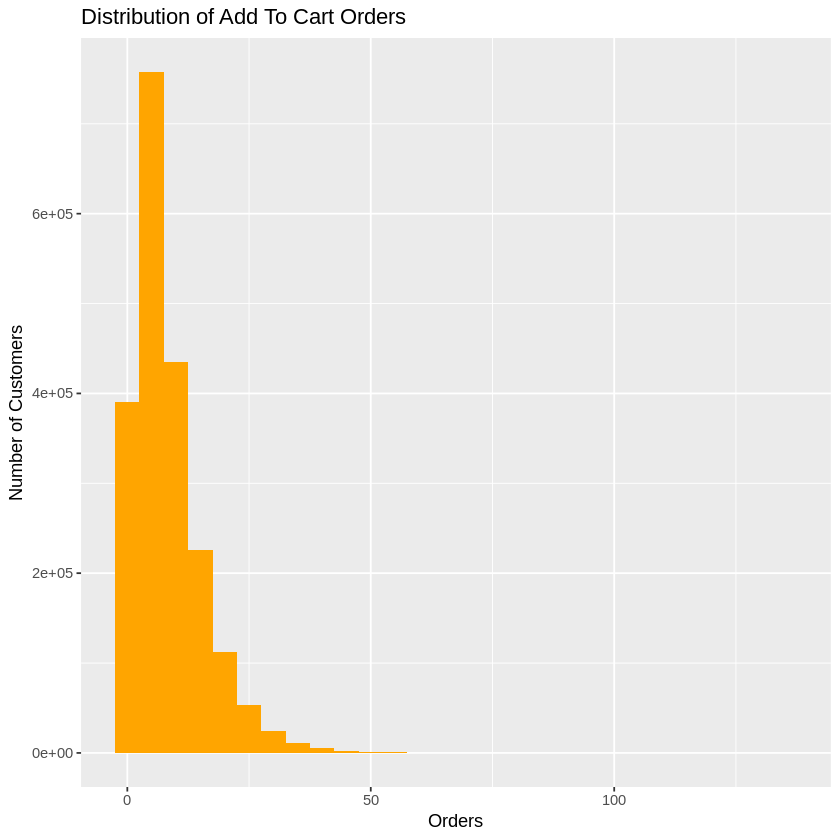

In [ ]:
# outlier detection
ggplot(df, aes(y = add_to_cart_order)) +
  geom_boxplot(fill = "lightblue") +
  ggtitle("Boxplot of Days Since Prior Order") +
  ylab("Days Since Prior Order")
#histogram
ggplot(df, aes(x = add_to_cart_order)) +
  geom_histogram(binwidth = 5, fill = "orange") +
  ggtitle("Distribution of Add To Cart Orders") +
  xlab("Orders") + ylab("Number of Customers")


In [ ]:
#iqr method to remove outliers
Q1 <- quantile(df$add_to_cart_order, 0.25, na.rm = TRUE)
Q3 <- quantile(df$add_to_cart_order, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
df <- df[df$add_to_cart_order >= lower_bound & df$add_to_cart_order <= upper_bound, ]
dim(df)

[1] 1934750      12

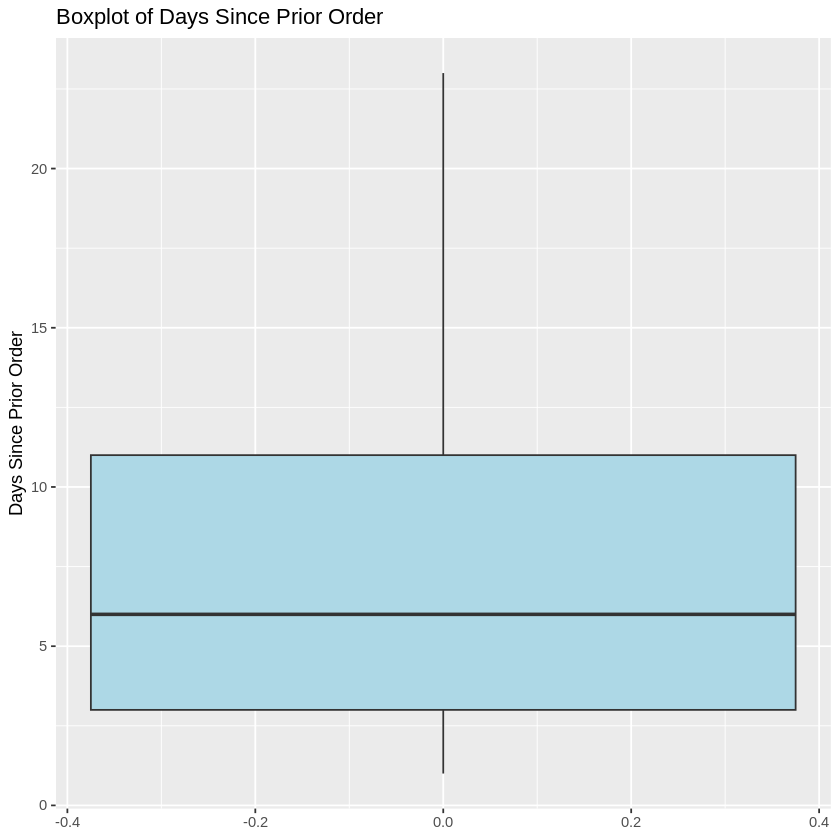

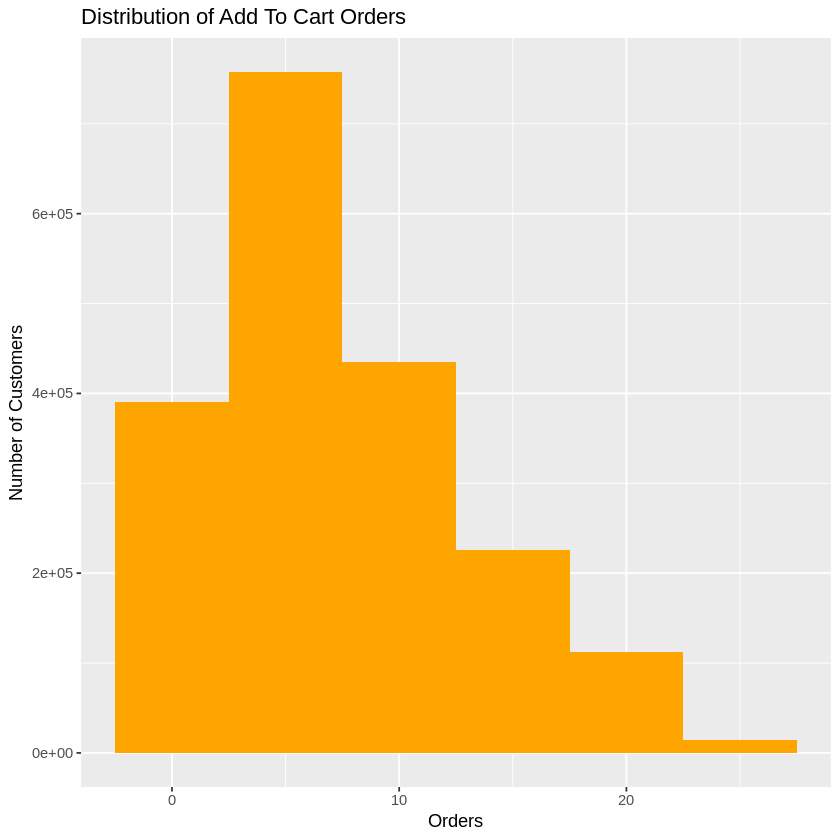

In [ ]:
# outlier detection
ggplot(df, aes(y = add_to_cart_order)) +
  geom_boxplot(fill = "lightblue") +
  ggtitle("Boxplot of Days Since Prior Order") +
  ylab("Days Since Prior Order")
#histogram
ggplot(df, aes(x = add_to_cart_order)) +
  geom_histogram(binwidth = 5, fill = "orange") +
  ggtitle("Distribution of Add To Cart Orders") +
  xlab("Orders") + ylab("Number of Customers")

In [ ]:
#label encoding
df$department <- as.numeric(as.factor(df$department))
df$product_name <- as.numeric(as.factor(df$product_name)) #a factor is a special data type used to represent categorical variables
head(df)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,2425083,49125,1,2,18,8,17,1,0,13,17,7
2,2425083,49125,1,2,18,8,91,2,0,16,8,120
3,2425083,49125,1,2,18,8,36,3,0,16,8,18
4,2425083,49125,1,2,18,8,83,4,0,4,20,54
5,2425083,49125,1,2,18,8,83,5,0,4,20,54
6,2425083,49125,1,2,18,8,91,6,0,16,8,120


In [ ]:
#standarising
dfs <- df %>%
  mutate(across(where(is.numeric), scale))
head(dfs)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,-1.4189852,-1.1830038,-1.215111,0.4935883,0.5858067,-1.7387897
2,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,0.5185293,-0.9984530,-1.215111,0.9714700,-0.8039843,1.3928730
3,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,-0.9215153,-0.8139023,-1.215111,0.9714700,-0.8039843,-1.4339376
4,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,0.3090683,-0.6293515,-1.215111,-0.9400568,1.0490704,-0.4362397
5,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,0.3090683,-0.4448007,-1.215111,-0.9400568,1.0490704,-0.4362397
6,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,0.5185293,-0.2602499,-1.215111,0.9714700,-0.8039843,1.3928730


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



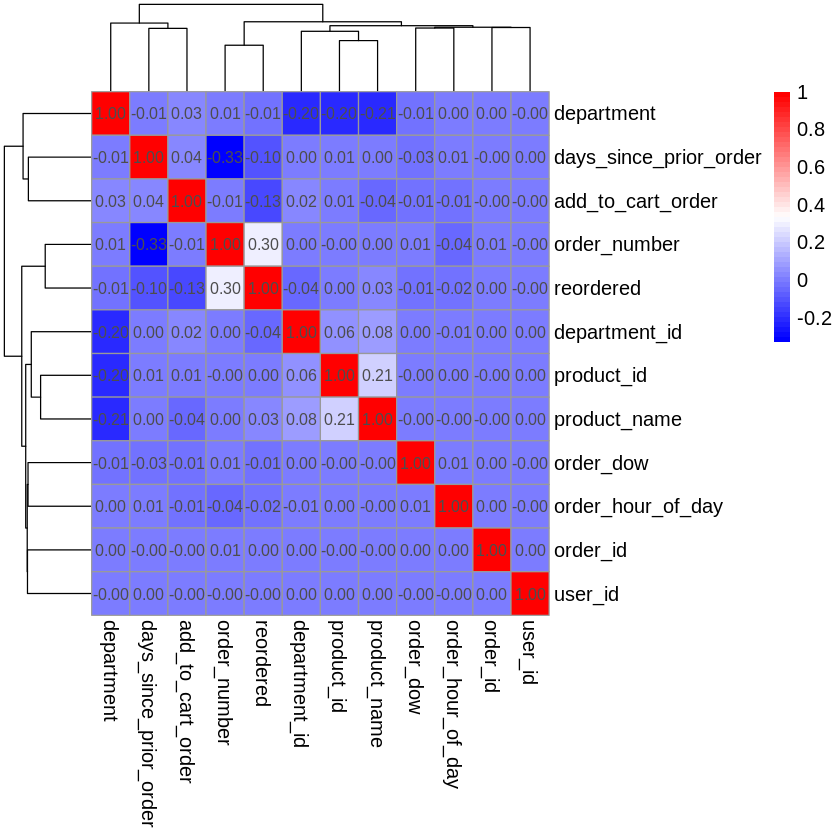

In [ ]:
install.packages("pheatmap")
library(pheatmap)

cor_matrix <- cor(dfs, use = "complete.obs")

pheatmap(cor_matrix, color = colorRampPalette(c("blue", "white", "red"))(50),
         display_numbers = TRUE, fontsize = 12)


Notable correlations:

add_to_cart_order and order_number (≈ 0.30) → Moderate correlation.

product_id and product_name (≈ 0.21) → Weak correlation.

days_since_prior_order and add_to_cart_order (≈ -0.33) → Negative correlation.

Product ID and product name are somewhat correlated, likely because each product ID corresponds to a unique product name.


# **INFERENTIAL ANALYSIS**

In [ ]:
# Test if reordered products have significantly different order frequency
t.test(dfs$order_number ~ dfs$reordered)


	Welch Two Sample t-test

data:  dfs$order_number by dfs$reordered
t = -468.13, df = 1926858, p-value < 2.2e-16
alternative hypothesis: true difference in means between group -1.21511114159483 and group 0.822969561306845 is not equal to 0
95 percent confidence interval:
 -0.6180710 -0.6129171
sample estimates:
mean in group -1.21511114159483 mean in group 0.822969561306845 
                     -0.3669598                       0.2485342 


The Welch Two Sample t-test is used to compare the means of two groups (here, reordered vs. not reordered products) to check if there is a statistically significant difference in their order_number.




There is a significant difference in order frequency between reordered and non-reordered products.


Since reordered products have a lower mean order number, they may be purchased less frequently or later in order cycles.

# **ASSOCIATION RULE MINING**

In [ ]:
# create a new column for association
ecom_data$prod_cat <- paste(ecom_data$department, ecom_data$product_name)
# Convert transactions into a format for association rules
transactions <- as(split(ecom_data$prod_cat, ecom_data$order_id), "transactions")
# Generate association rules
rules <- apriori(transactions, parameter = list(supp = 0.01, conf = 0.5))#If Milk → Bread has 0.05 support, it means 5% of orders had both items.If Milk → Bread has 70% confidence, it means that 70% of customers who bought milk also bought bread.
# Inspect the top rules
inspect(rules)#inspect() is a function from the arules package that is used to view association rules in Market Basket Analysis.

Warning message in asMethod(object):
“removing duplicated items in transactions”


Streaming output truncated to the last 5000 lines.
[1654] {dairy eggs milk,                                                                                                               
        produce fresh vegetables,                                                                                                      
        snacks nuts seeds dried fruit}            => {produce fresh fruits}               0.011610  0.8808801 0.013180 1.5843310   2322
[1655] {dairy eggs milk,                                                                                                               
        produce fresh fruits,                                                                                                          
        snacks nuts seeds dried fruit}            => {produce fresh vegetables}           0.011610  0.6748038 0.017205 1.5185972   2322
[1656] {dairy eggs packaged cheese,                                                                                                  

Support (supp): 0.011610 → 1.16% of all transactions contain these items together.

Confidence (conf): 0.8808801 → When customers buy {dairy eggs milk,produce fresh vegetables, snacks nuts seeds dried fruit}, 88.1% of the time, they also buy produce fresh fruits.

Lift (lift): 1.5843310 → Buying these items makes it 1.58 times more likely that the customer will also buy fresh fruits.

Count: 2322 → This rule appears 2,322 times in the dataset

In [ ]:
install.packages("reticulate")
library(reticulate)
#convert to df and take important features
rules_df <- as(rules, "data.frame")

# Select only relevant columns
rules_df <- rules_df[, c("rules", "confidence", "lift")]

# Save rules as a CSV for Python to use
write.csv(rules_df, "/content/rules.csv", row.names = FALSE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’


Warning message in system("python3 /content/gradio_app.py", intern = TRUE):
“running command 'python3 /content/gradio_app.py' had status 1”


Gradio app launched successfully!

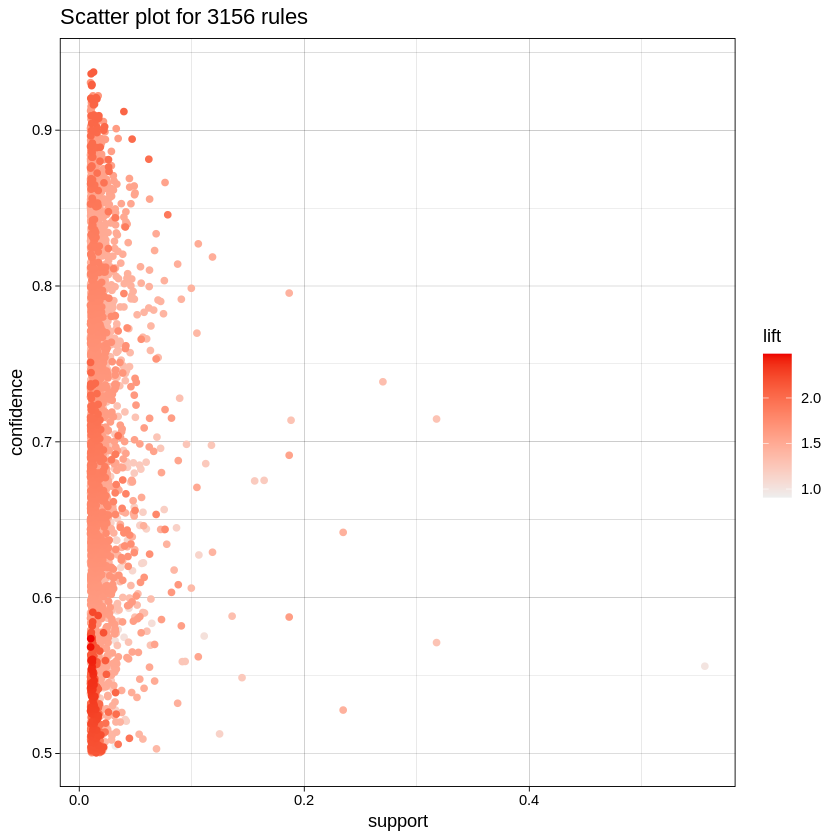

In [ ]:
plot(rules, method = "scatterplot", measure = c("support", "confidence"), shading = "lift")

The majority of the points are clustered near 0 on the x-axis, indicating that these rules apply to a small fraction of transactions.

This means most associations are specific to niche products rather than frequent purchases.

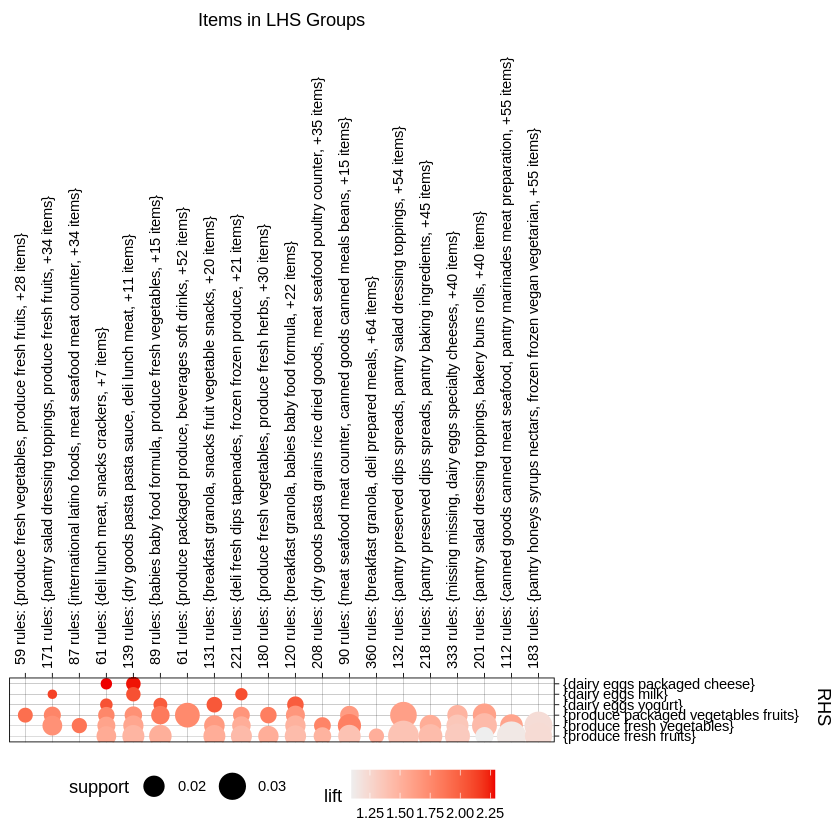

In [ ]:
plot(rules, method = "grouped")


Left-Hand Side (LHS): The vertical labels represent different item groups that are frequently purchased together.

Right-Hand Side (RHS): The bottom labels indicate the consequent (i.e., what products are most likely to be bought when the LHS items are present).

Bubble Size: Larger bubbles indicate higher support (i.e., how frequently the combination appears in transactions).

Bubble Color: Darker bubbles suggest stronger rules in terms of confidence and lift.

Key Takeaways:

Strong Product Associations:

Customers who buy dairy products (milk, yogurt, cheese) often buy fresh fruits and vegetables.

Bakery items, pasta, and breakfast foods are frequently grouped together.

Meat and seafood products are commonly purchased with international foods.


Popular Items for Recommendations:

If a customer purchases dairy products, they are likely to also buy fresh produce.

Customers who purchase pantry staples (grains, pasta, sauces, baking ingredients) might also buy packaged vegetables and fruits.

Market Basket Insights:

Grocery stores can use these insights to optimize product placement and bundle promotions.

Items frequently appearing in association rules can be used for cross-selling and recommendation systems.

# **CLUSTERING AND RECOMMENDATIONS**

In [ ]:
head(df)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,2425083,49125,1,2,18,8,17,1,0,13,17,7
2,2425083,49125,1,2,18,8,91,2,0,16,8,120
3,2425083,49125,1,2,18,8,36,3,0,16,8,18
4,2425083,49125,1,2,18,8,83,4,0,4,20,54
5,2425083,49125,1,2,18,8,83,5,0,4,20,54
6,2425083,49125,1,2,18,8,91,6,0,16,8,120


In [ ]:
head(dfs)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,-1.4189852,-1.1830038,-1.215111,0.4935883,0.5858067,-1.7387897
2,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,0.5185293,-0.9984530,-1.215111,0.9714700,-0.8039843,1.3928730
3,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,-0.9215153,-0.8139023,-1.215111,0.9714700,-0.8039843,-1.4339376
4,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,0.3090683,-0.6293515,-1.215111,-0.9400568,1.0490704,-0.4362397
5,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,0.3090683,-0.4448007,-1.215111,-0.9400568,1.0490704,-0.4362397
6,0.7278094,-0.9063545,-0.9200431,-0.351915,1.074566,-0.3583851,0.5185293,-0.2602499,-1.215111,0.9714700,-0.8039843,1.3928730


In [ ]:
# grouping avg_days_since_prior,avg_cart_size,reorder_rate for each user
df_user <- df %>%
  group_by(user_id) %>%
  summarize(avg_days_since_prior = mean(days_since_prior_order, na.rm = TRUE),
            avg_cart_size = mean(add_to_cart_order, na.rm = TRUE),
            reorder_rate = mean(reordered, na.rm = TRUE))

# Standardize data for clustering
df_scaled <- scale(df_user[, -1])  # Remove user_id before scaling
head(df_scaled)

avg_days_since_prior,avg_cart_size,reorder_rate
-0.67022329,-0.76115962,-0.5641665
-0.03211555,-0.53955573,-0.2123505
1.96994065,2.10554600,0.9142589
0.14770985,2.10554600,-0.4757137
1.96994065,0.13468589,-0.8547972
-0.64951612,-0.02955245,0.1914731


In [ ]:
# applying K-Means clustering
set.seed(123) # for same results everytime
clusters <- kmeans(df_scaled, centers = 3)

# Assign cluster labels
df_user$Cluster <- as.factor(clusters$cluster)
head(df_user)

user_id,avg_days_since_prior,avg_cart_size,reorder_rate,Cluster
<int>,<dbl>,<dbl>,<dbl>,<fct>
2,6.818182,3.272727,0.3636364,1
3,12.421053,3.947368,0.4736842,1
7,30.000000,12.000000,0.8260870,2
10,14.000000,12.000000,0.3913043,2
11,30.000000,6.000000,0.2727273,3
13,7.000000,5.500000,0.6000000,1


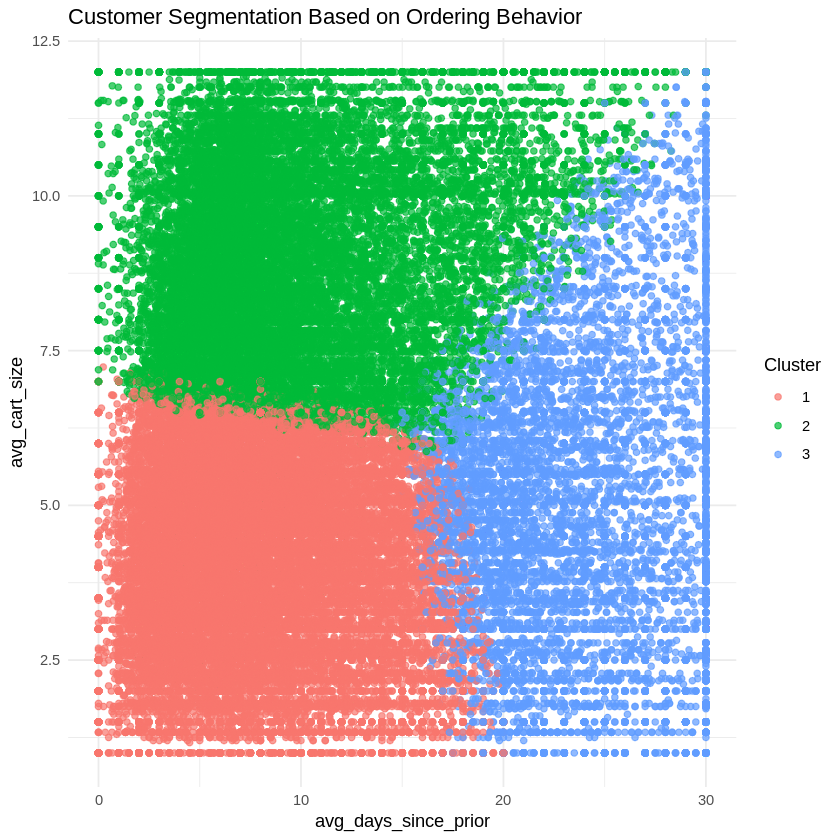

In [ ]:

#scatter plot
ggplot(df_user, aes(x = avg_days_since_prior, y = avg_cart_size, color = Cluster)) +
  geom_point(alpha = 0.7) +
  ggtitle("Customer Segmentation Based on Ordering Behavior") +
  theme_minimal()


Red Cluster (Bottom-Left) → Customers with small cart sizes and frequent orders

Green Cluster (Top-Left) → Customers with large cart sizes and frequent orders

Blue Cluster (Right Side) → Customers with long gaps between orders, possibly infrequent shoppers

**INSIGHTS**

High-value customers (green) should be targeted with retention strategies.

Low-value customers (red) can be encouraged to increase spending.

Occasional bulk buyers (blue) might need seasonal promotions to enhance engagement.

# **PREDICTIVE AND CHURN ANALYSIS**

In [ ]:
# churn: If a user hasn't ordered in 30+ days, they are considered at risk
df$churn <- ifelse(df$days_since_prior_order >= 30, 1, 0)
#glm---Generalized Linear Model for logistic regression
churn_model <- glm(churn ~ order_hour_of_day + order_dow + days_since_prior_order + order_number + department,
                   data = df,
                   family = binomial)

#summary(churn_model)
head(df)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,churn
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2425083,49125,1,2,18,8,17,1,0,13,17,7,0
2,2425083,49125,1,2,18,8,91,2,0,16,8,120,0
3,2425083,49125,1,2,18,8,36,3,0,16,8,18,0
4,2425083,49125,1,2,18,8,83,4,0,4,20,54,0
5,2425083,49125,1,2,18,8,83,5,0,4,20,54,0
6,2425083,49125,1,2,18,8,91,6,0,16,8,120,0


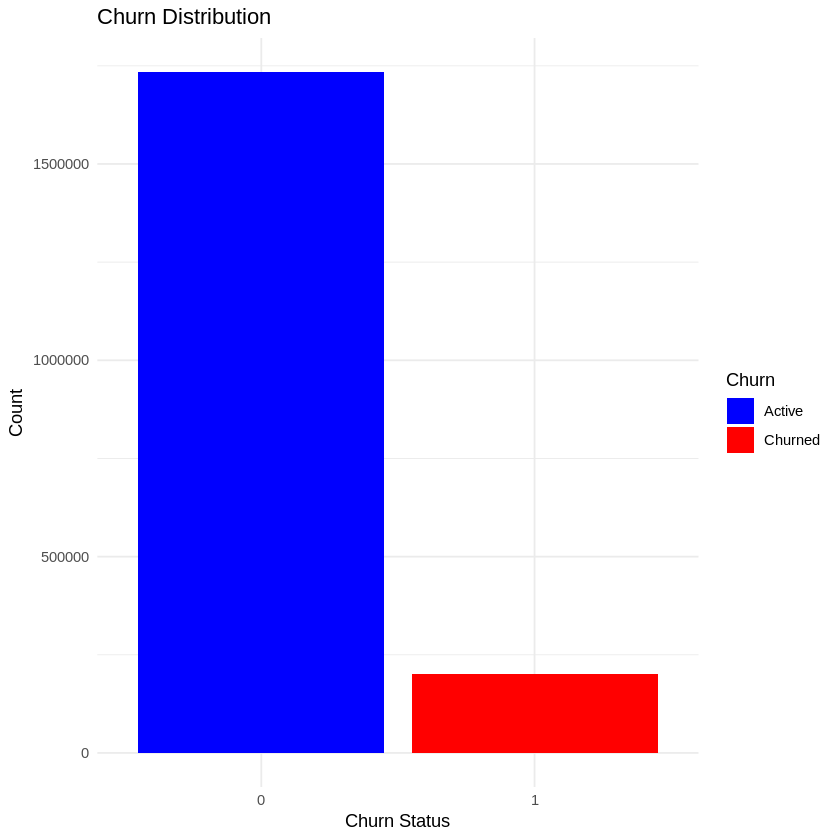

In [ ]:

ggplot(df, aes(x = as.factor(churn), fill = as.factor(churn))) +
  geom_bar() +
  scale_fill_manual(values = c("blue", "red"), labels = c("Active", "Churned")) +
  labs(title = "Churn Distribution", x = "Churn Status", y = "Count", fill = "Churn") +
  theme_minimal()


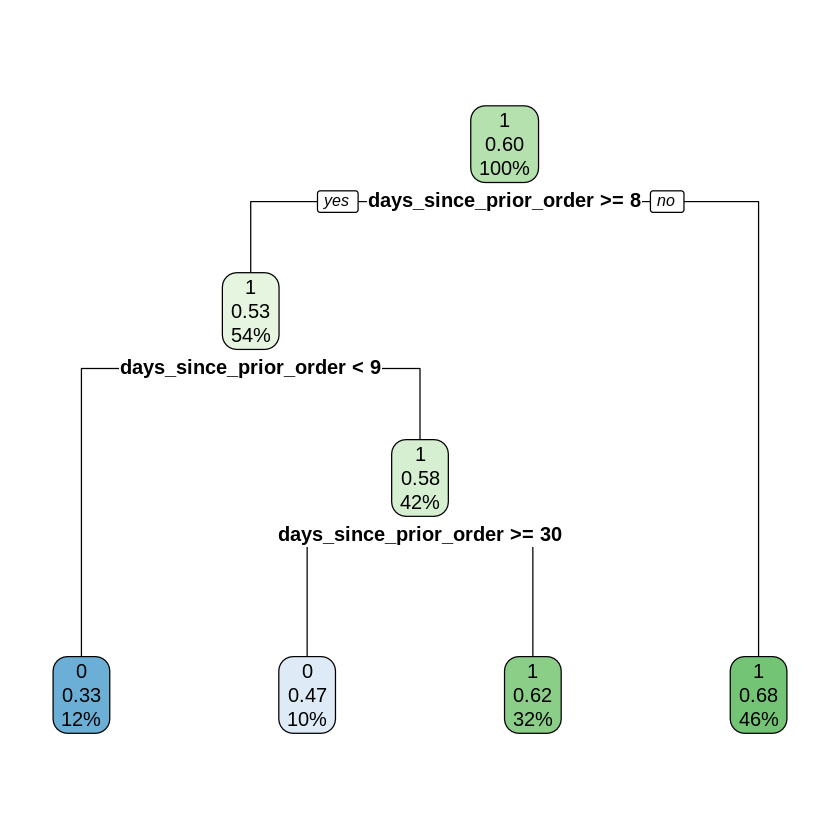

In [ ]:
# dtree
tree_model <- rpart(reordered ~ order_hour_of_day + order_dow + days_since_prior_order,
                    data = df,
                    method = "class")

# plot
rpart.plot(tree_model)

12% of users are in a very safe zone (active). <9

10% are in a moderate risk group (watch closely).>9 but <30

32% are likely to churn (high risk). >30

46% have the highest churn probability (most likely to leave). >8